In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

(-0.5, 63.5, 63.5, -0.5)

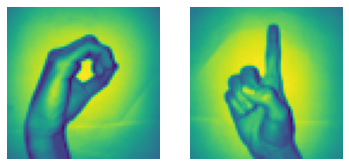

In [29]:
# load data set
x_l = np.load('X.npy')
Y_l = np.load('Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [30]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [31]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [32]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


In [33]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


In [34]:
# short description and example of definition (def)
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)     # result = 8

# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [35]:
#w,b = initialize_weights_and_bias(4096)

In [36]:
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

y_head = sigmoid(10)
# x = [-5,5,1]
# y = [sigmoid(xx) for xx in x]
# plt.scatter(x, y)
y_head

0.9999546021312976

In [37]:
# Forward propagation steps:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost

In [38]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

In [39]:
# prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


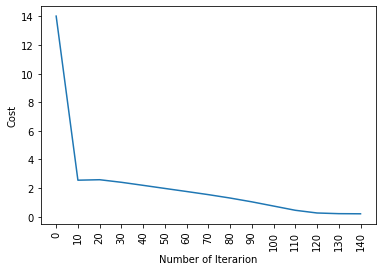

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [40]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

## Sklearn 逻辑回归

In [41]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


# ANN

In [42]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

Cost after iteration 0: 0.348279
Cost after iteration 100: 0.333698
Cost after iteration 200: 0.329078
Cost after iteration 300: 0.310803
Cost after iteration 400: 0.274758
Cost after iteration 500: 0.228362
Cost after iteration 600: 0.184320
Cost after iteration 700: 0.148352
Cost after iteration 800: 0.120422
Cost after iteration 900: 0.101049
Cost after iteration 1000: 0.086937
Cost after iteration 1100: 0.075829
Cost after iteration 1200: 0.066698
Cost after iteration 1300: 0.058994
Cost after iteration 1400: 0.052386
Cost after iteration 1500: 0.046676
Cost after iteration 1600: 0.041750
Cost after iteration 1700: 0.037523
Cost after iteration 1800: 0.033913
Cost after iteration 1900: 0.030840
Cost after iteration 2000: 0.028227
Cost after iteration 2100: 0.025999
Cost after iteration 2200: 0.024083
Cost after iteration 2300: 0.022421
Cost after iteration 2400: 0.020964


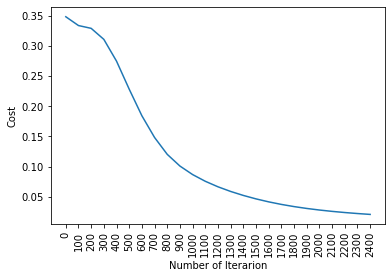

train accuracy: 100.0 %
test accuracy: 95.16129032258064 %


In [43]:
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

# L Layer Neural Network


In [44]:
# reshaping
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [45]:
x_train.shape

(348, 4096)

##Implementing with keras library¶
Lets look at some parameters of keras library:

* units: output dimensions of node
* kernel_initializer: to initialize weights
* activation: activation function, we use relu
* input_dim: input dimension that is number of pixels in our images (4096 px)
* optimizer: we use adam optimizer
* Adam is one of the most effective optimization algorithms for training neural networks.
* Some advantages of Adam is that relatively low memory requirements and usually works well even with little tuning of hyperparameters
* loss: Cost function is same. By the way the name of the cost function is cross-entropy cost function that we use previous parts.
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small$$
* metrics: it is accuracy.
* cross_val_score: use cross validation. If you do not know cross validation please chech it from my machine learning tutorial. https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners
* epochs: number of iteration

In [49]:
# Evaluating the ANN
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential # initialize neural network library
from tensorflow.keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 232 samples
Epoch 1/100
232/232 [==============================] - 1s 4ms/sample - loss: 0.6931 - accuracy: 0.5172
Epoch 2/100
232/232 [==============================] - 0s 120us/sample - loss: 0.6929 - accuracy: 0.5431
Epoch 3/100
232/232 [==============================] - 0s 99us/sample - loss: 0.6928 - accuracy: 0.5431
Epoch 4/100
232/232 [==============================] - 0s 112us/sample - loss: 0.6927 - accuracy: 0.5431
Epoch 5/100
232/232 [==============================] - 0s 107us/sample - loss: 0.6926 - accuracy: 0.5431
Epoch 6/100
232/232 [==============================] - 0s 107us/sample - loss: 0.6924 - accuracy: 0.5431
Epoch 7/100
232/232 [==============================] - 0s 115us/sample - loss: 0.6923 - accuracy: 0.5431
Epoch 8/100
232/232 [==============================] - 0s 116us/sample - loss: 0.6922 - accuracy: 0.5431
Epoch 9/100
232/232 [===========================

232/232 [==============================] - 0s 95us/sample - loss: 0.6896 - accuracy: 0.5431
Epoch 76/100
232/232 [==============================] - 0s 99us/sample - loss: 0.6896 - accuracy: 0.5431
Epoch 77/100
232/232 [==============================] - 0s 90us/sample - loss: 0.6896 - accuracy: 0.5431
Epoch 78/100
232/232 [==============================] - 0s 125us/sample - loss: 0.6895 - accuracy: 0.5431
Epoch 79/100
232/232 [==============================] - 0s 125us/sample - loss: 0.6895 - accuracy: 0.5431
Epoch 80/100
232/232 [==============================] - 0s 125us/sample - loss: 0.6895 - accuracy: 0.5431
Epoch 81/100
232/232 [==============================] - 0s 116us/sample - loss: 0.6895 - accuracy: 0.5431
Epoch 82/100
232/232 [==============================] - 0s 129us/sample - loss: 0.6895 - accuracy: 0.5431
Epoch 83/100
232/232 [==============================] - 0s 116us/sample - loss: 0.6895 - accuracy: 0.5431
Epoch 84/100
232/232 [==============================] - 0s 95u

232/232 [==============================] - 0s 95us/sample - loss: 0.6923 - accuracy: 0.5216
Epoch 52/100
232/232 [==============================] - 0s 103us/sample - loss: 0.6923 - accuracy: 0.5216
Epoch 53/100
232/232 [==============================] - 0s 95us/sample - loss: 0.6923 - accuracy: 0.5216
Epoch 54/100
232/232 [==============================] - 0s 99us/sample - loss: 0.6923 - accuracy: 0.5216
Epoch 55/100
232/232 [==============================] - 0s 95us/sample - loss: 0.6923 - accuracy: 0.5216
Epoch 56/100
232/232 [==============================] - 0s 116us/sample - loss: 0.6923 - accuracy: 0.5216
Epoch 57/100
232/232 [==============================] - 0s 120us/sample - loss: 0.6923 - accuracy: 0.5216
Epoch 58/100
232/232 [==============================] - 0s 138us/sample - loss: 0.6923 - accuracy: 0.5216
Epoch 59/100
232/232 [==============================] - 0s 101us/sample - loss: 0.6923 - accuracy: 0.5216
Epoch 60/100
232/232 [==============================] - 0s 99us

Epoch 28/100
232/232 [==============================] - 0s 90us/sample - loss: 0.4620 - accuracy: 0.8491
Epoch 29/100
232/232 [==============================] - 0s 87us/sample - loss: 0.4484 - accuracy: 0.9052
Epoch 30/100
232/232 [==============================] - 0s 90us/sample - loss: 0.4457 - accuracy: 0.8750
Epoch 31/100
232/232 [==============================] - 0s 82us/sample - loss: 0.4346 - accuracy: 0.8966
Epoch 32/100
232/232 [==============================] - 0s 86us/sample - loss: 0.4314 - accuracy: 0.9095
Epoch 33/100
232/232 [==============================] - 0s 95us/sample - loss: 0.4222 - accuracy: 0.9009
Epoch 34/100
232/232 [==============================] - 0s 90us/sample - loss: 0.4147 - accuracy: 0.9267
Epoch 35/100
232/232 [==============================] - 0s 90us/sample - loss: 0.4178 - accuracy: 0.8707
Epoch 36/100
232/232 [==============================] - 0s 86us/sample - loss: 0.4040 - accuracy: 0.9267
Epoch 37/100
232/232 [==============================] -